In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
IDtest = test['PassengerId']

### outflier detection
- 데이터 이상치 탐색
- 나중에 공부 - 잘 모르겠다.  사후검증 / tukey method 공부 하기

In [3]:
train_len = len(train) # 891
dataset = pd.concat(objs = [train, test], axis = 0).reset_index(drop = True)
# axis : 1이면 행을 좌우로 붙임, 0이면 상하로 붙임, concat : df들을 붙임
# .reset_index : 인덱스를 새로 배열, 기존 인덱스는 새로운 feature가 됨
# drop = True : 기존의 인덱스를 없애기

- axis : 1이면 행을 좌우로 붙임, 0이면 상하로 붙임, concat : df들을 붙임
- .reset_index : 인덱스를 새로 배열, 기존 인덱스는 새로운 feature가 됨
- drop = True : 기존의 인덱스를 없애기
- 참조 :  https://koreadatascientist.tistory.com/14

In [4]:
dataset = dataset.fillna(np.nan) # 결측치 채우기
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
test.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


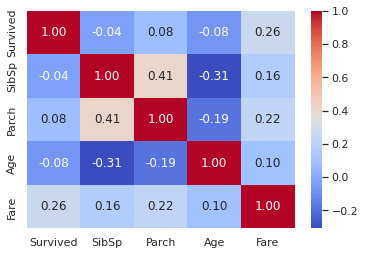

In [9]:
g = sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age','Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

- Fare는 Survived와 큰 상관관계가 있고 다른 것들은 미미하다. 하지만 다른 것들도 아예 상관이 없는것은 아니기 때문에 신경써주어야 한다.
### SibSp

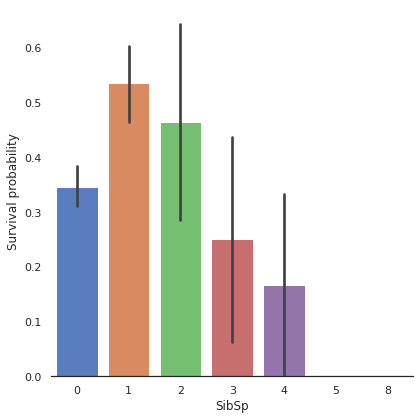

In [10]:
g = sns.factorplot(x='SibSp', y = 'Survived', data = train, kind = 'bar', size = 6, palette = 'muted')
g.despine(left = True)
g = g.set_ylabels('Survival probability')

- sibsp가 1~2 일 경우 3~4보다 더 생존가능성이 높다
### Parch

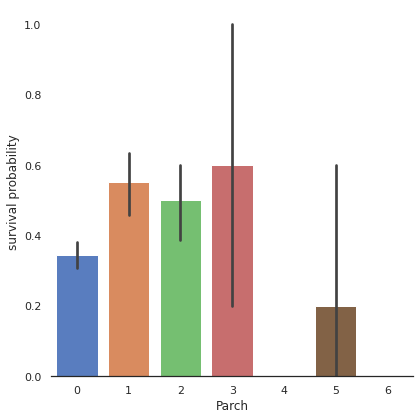

In [11]:
g = sns.factorplot(x="Parch",y="Survived",data = train, kind = 'bar', size = 6, palette = 'muted')
g.despine(left=True) # y축 사라짐
g = g.set_ylabels("survival probability")

### Age

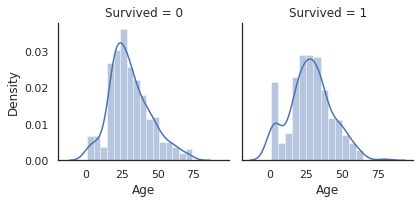

In [12]:
g = sns.FacetGrid(train, col = 'Survived')
g = g.map(sns.distplot, 'Age')

- 생존한 나이와 생존하지 못한 나이의 상관관계는 존재하지 않아 보인다. 
- 젊은 층이 가장 많이 산 동시에 가장 많이 죽었기 때문이다.
- 하지만 나이와 생존의 상관관계가 없다고 할 지라도 더 많이 생존하거나 생존하지 못한 범주를 구할 수 있다.
    - 예를 들어 어린 나이들은 더 생존할 가능성들이 있다.

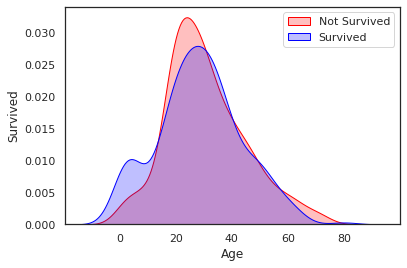

In [13]:
g= sns.kdeplot(train['Age'][(train['Survived']==0)& (train['Age'].notnull())], color = 'Red', shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel('Age')
g.set_ylabel('Survived')
g = g.legend(['Not Survived', 'Survived'])

- 0~5 사이에 우리는 상관관계를 볼 수 있다.
### Fare

In [14]:
dataset['Fare'].isnull().sum()

1

In [15]:
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

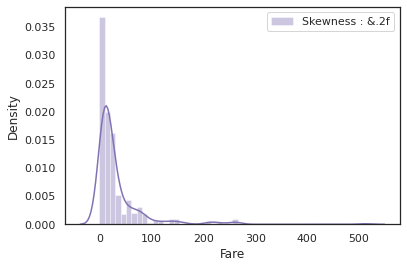

In [16]:
g = sns.distplot(dataset['Fare'], color = 'm',label = 'Skewness : &.2f' %(dataset['Fare'].skew()))
g = g.legend(loc="best")

- skewed : 분포가 비대칭하다
- fare분포는 매우 비대칭하다
    - 그래서 log로 skwe를 감소시킨다

In [17]:
dataset['Fare'] = dataset['Fare'].map(lambda i : np.log(i) if i>0 else 0)

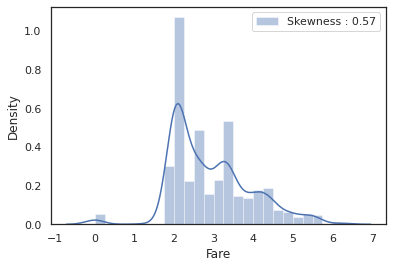

In [18]:
g = sns.distplot(dataset["Fare"], color="b", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

- skew가 어느정도 감소되었다
###  Categorical values - Sex

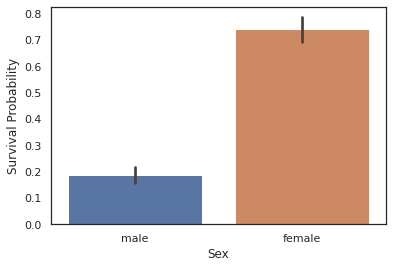

In [19]:
g = sns.barplot(x = 'Sex', y = 'Survived', data = train)
g = g.set_ylabel('Survival Probability')

In [20]:
train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


- 여성의 생존률이 남성보다 높다
### Pclass

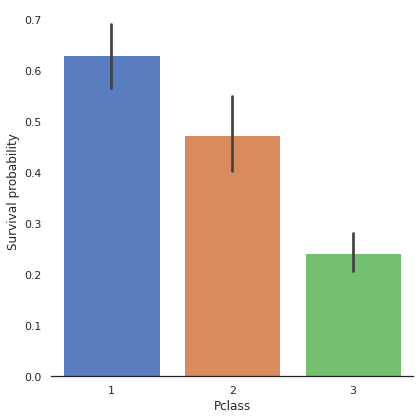

In [21]:
g = sns.factorplot(x = 'Pclass', y = 'Survived', data = train, kind = 'bar', size = 6, palette = 'muted')
g.despine(left = True)
g = g.set_ylabels('Survival probability')

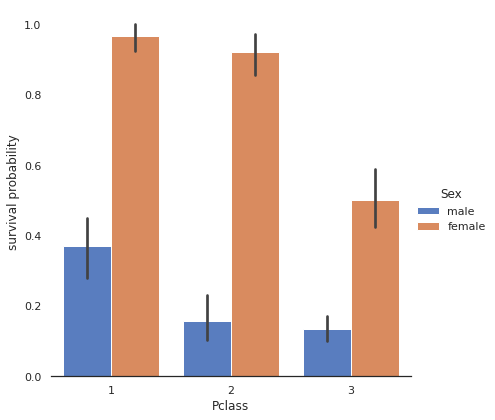

In [22]:
# Explore Pclass vs Survived by Sex
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train, size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

- 각 클래스별로 생존률이 다르다. 1>2>3의 순서로 생존률이 낮아지고 있다.
### Embarked

In [23]:
dataset['Embarked'].isnull().sum()

2

In [24]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

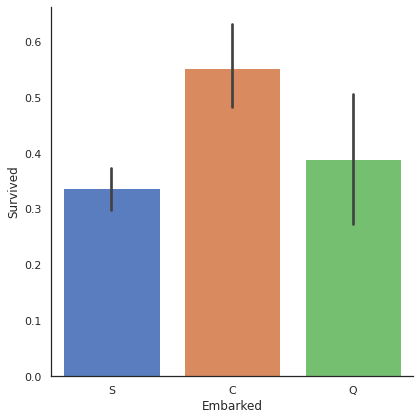

In [25]:
sns.factorplot('Embarked', 'Survived', data = train, size = 6, kind = 'bar', palette = 'muted')

- C항구의 생존률이 가장 높다. 따라서 1Pclass사람들이 C에서 탑승했을 거라는 가설을 세울 수 있다.

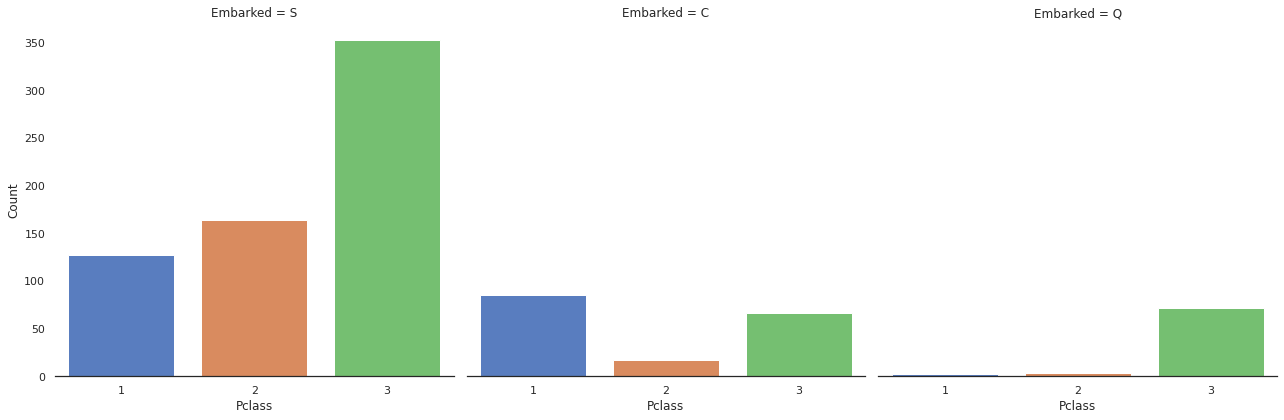

In [26]:
# 가설 증명해보기
g = sns.factorplot('Pclass',col = 'Embarked' , data = train, kind = 'count', size = 6, palette = 'muted')
g.despine(left = True)
g =g.set_ylabels('Count')

- S 와 C의 항구에서 Pclass 1,2승객들이 많이 탑승했다. 하지만 1Pclas승객들은 S에서 가장 많이 탑승했다. 

## 결측치 채우기
### Age
- Age결측치는 25개이다. 
- Age결측치를 채우기 전에 Sex, Parch, Pcalss, SibSp들의 상관관계를 본다
- factorplot은 범주형특징을 표현하기 위해 사용

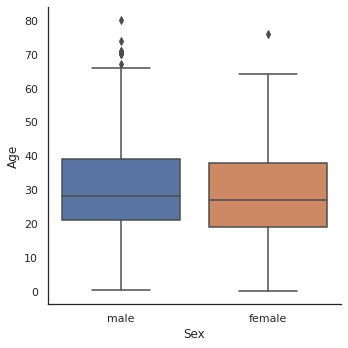

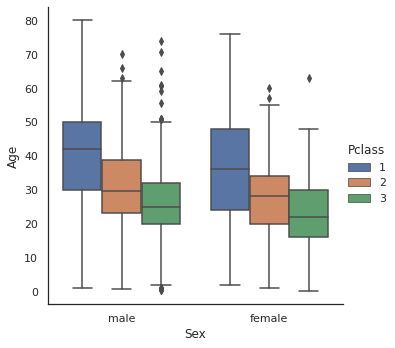

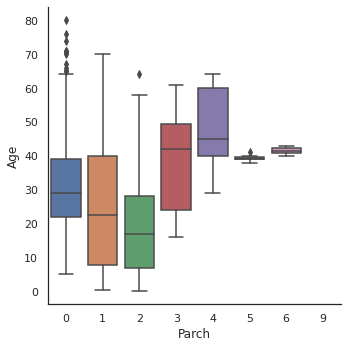

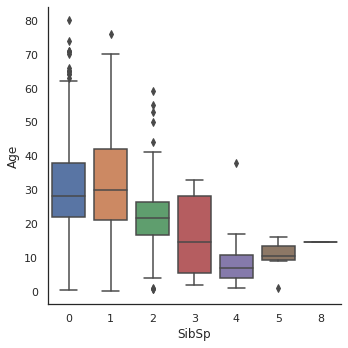

In [27]:
g = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")

In [28]:
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

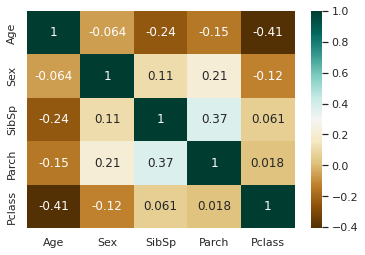

In [29]:
g = sns.heatmap(dataset[['Age','Sex','SibSp','Parch','Pclass']].corr(),cmap='BrBG', annot = True)

In [30]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,S


In [31]:
index_NaN_age = list(dataset['Age'][dataset['Age'].isnull()].index) # age nulldata 추출

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med
# isnan : NaN 데이터면 True를 반환
# age의 null data행의 Sibsp, parch, pclass가 같은 age의 평균을 집어넣는다. 

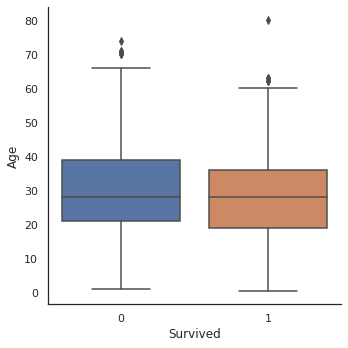

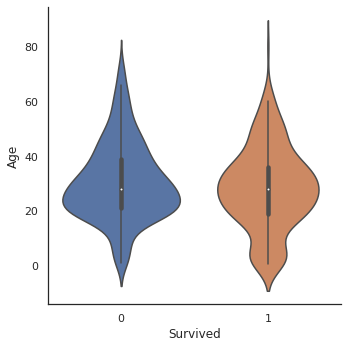

In [32]:
g = sns.factorplot('Survived', 'Age', data = train, kind = 'box')
g = sns.factorplot('Survived', 'Age', data = train, kind = 'violin')

## Feature engineering

In [33]:
dataset['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [34]:
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in dataset['Name']]
dataset['Title'] = pd.Series(dataset_title)
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

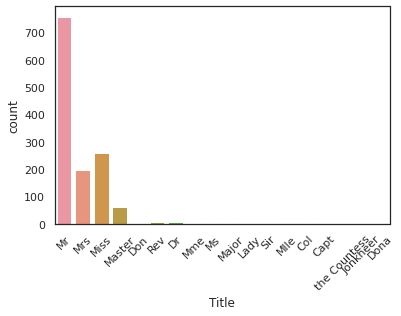

In [35]:
g = sns.countplot('Title', data = dataset)
g = plt.setp(g.get_xticklabels(), rotation=45)

In [36]:
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

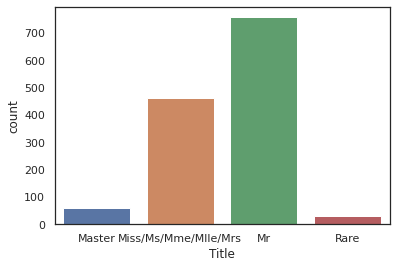

In [37]:
g = sns.countplot(dataset['Title'])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

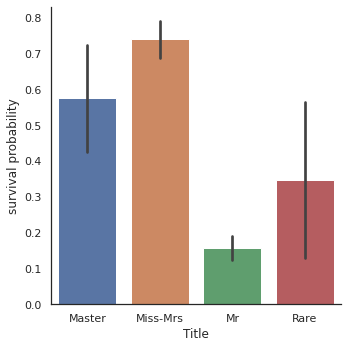

In [38]:
g = sns.factorplot("Title","Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

- 여성과 아이들이 우선이라는 것을 볼 수 있고,희귀한 이름들이 생존가능성이 남성보다많다

In [39]:
dataset.drop(labels = ['Name'], axis = 1, inplace = True)

- Family Size

In [40]:
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

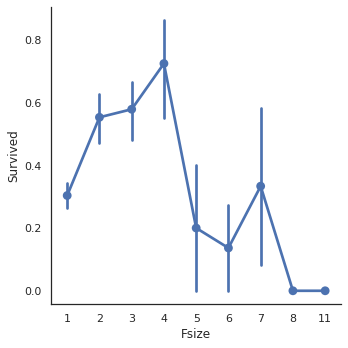

In [41]:
g = sns.factorplot('Fsize', 'Survived', data = dataset)

In [42]:
dataset['Single'] = dataset['Fsize'].map(lambda s:1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

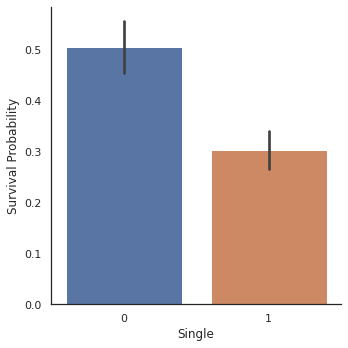

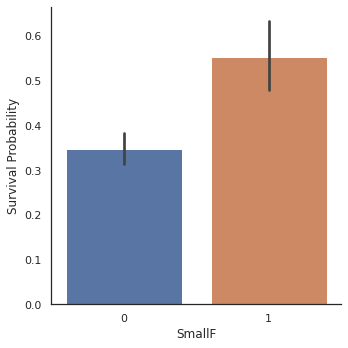

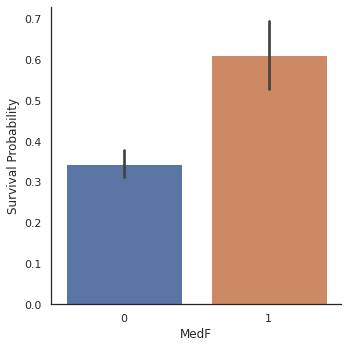

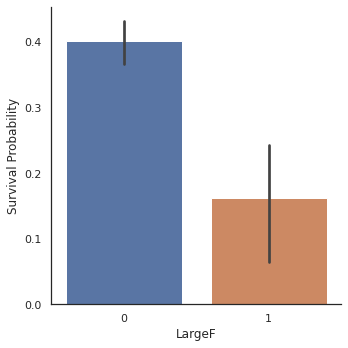

In [43]:
g = sns.factorplot('Single', 'Survived', data = dataset, kind = 'bar')
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

- small과 medf는 생존가능성이 더 있다
- get_dummies : 데이터들을 수치로 바꾸어주는 역할을 한다. (월,화,수 => 1,2,3)
    - 숫자로 바뀌면 서로 관계성이 생기지만 (1+2=3) 실제로는 생기지 않기 때문에(월+화 =수 라는 공식이 생기지 않음) dummies함수를 사용해서 독립성을 지켜야 한다.
    - https://devuna.tistory.com/67

In [44]:
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

In [45]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,...,1,0,0,0,0,1,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,...,1,0,0,0,1,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,...,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,...,1,0,0,0,1,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,...,0,0,0,0,0,1,0,0,0,1


### Cabin

In [46]:
dataset['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [47]:
dataset['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [48]:
dataset["Cabin"].isnull().sum()

1014

- cabin은 292의 값과 1007의 결측치가 있다
- cabin이 없는 승객은 결측치를 cabin숫자 대신으로 사용한다.

In [49]:
dataset['Cabin'][dataset['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [50]:
dataset['Cabin'] = pd.Series((i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin']))

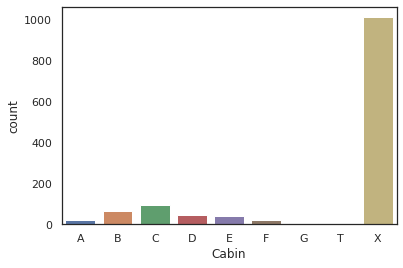

In [51]:
g = sns.countplot(dataset['Cabin'], order =['A','B','C','D','E','F','G','T','X'])
# order : 정렬

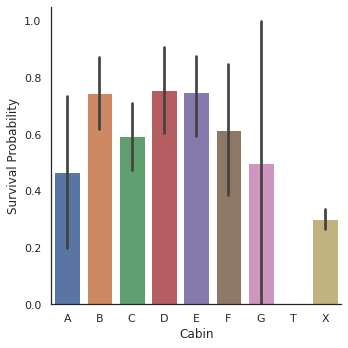

In [52]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

- 일반적으로 cabin을 가지고 있는 사람이 더 적어서  생존 확률은 중요한 표준 편차를 가지게 된다.

In [53]:
dataset = pd.get_dummies(dataset, columns = ['Cabin'], prefix = 'Cabin')

In [54]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Fsize,...,Em_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,2,...,1,0,0,0,0,0,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,2,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,2,...,1,0,0,1,0,0,0,0,0,0
4,5,0.0,3,0,35.0,0,0,373450,2.085672,1,...,1,0,0,0,0,0,0,0,0,1


### Ticket - 너무 과적합되는거 같아서 일단 뺌

In [55]:
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [56]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [57]:
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

In [58]:
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

## model

In [59]:
train =dataset[:train_len]
test = dataset [train_len :]
test.drop(labels = ['Survived'], axis = 1, inplace = True)

In [60]:
train["Survived"] = train["Survived"].astype(int)

Y_train = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)

- 10개의 대표적인 모델들을 사용해 교차검증을 해서 정확도 예측

In [61]:
kfold = StratifiedKFold(n_splits = 10)

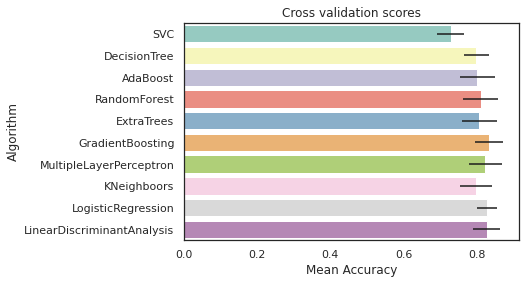

In [62]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")